## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hassan\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [3]:
dataset_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\online-retail-dataset\\versions\\1"

files = os.listdir(dataset_path)
print(files)


['online_retail_II.xlsx', '~$online_retail_II.xlsx']


In [5]:
file_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\online-retail-dataset\\versions\\1\\online_retail_II.xlsx"
# An error in the reading of the excel file caused only 1st sheet of the excel file to be accessed.
# This caused a loss of  the data especially since sheet 1 includes data from '09-'10 and sheet 2 shows data from '10-'11.
# Specifying sheet_name=None, to return all sheets in a dict(xls)
# Source: (https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)
xls = pd.read_excel(file_path, sheet_name=None)

In [6]:
#seperating dict into two dataframes
s1 = xls['Year 2009-2010']
s2 = xls['Year 2010-2011']
#combining the two dataframes into one
df = pd.concat([s1,s2])

print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [7]:
print(df.info())

# takeaways
# Description  incomplete  
# Customer ID incomplete

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB
None


In [8]:
print(df.isnull().sum())


# takeaways
# Description 4382 null values 
# Customer ID 243007 null values

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [9]:
X = df['StockCode']
X.value_counts()


StockCode
85123A       5829
22423        4424
85099B       4216
21212        3318
20725        3259
             ... 
DCGS0067        1
DCGS0066P       1
DCGS0071        1
DCGS0073        1
90197A          1
Name: count, Length: 5305, dtype: int64

In [10]:
# Fill missing 'Description' using the most common value per 'StockCode'
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

#Drop rows where 'Customer ID' is missing
df = df.dropna(subset=['Customer ID'])

print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [11]:
#Counting duplicated rows
print(df.duplicated().sum())

26479


In [12]:
#dropping duplicated rows
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


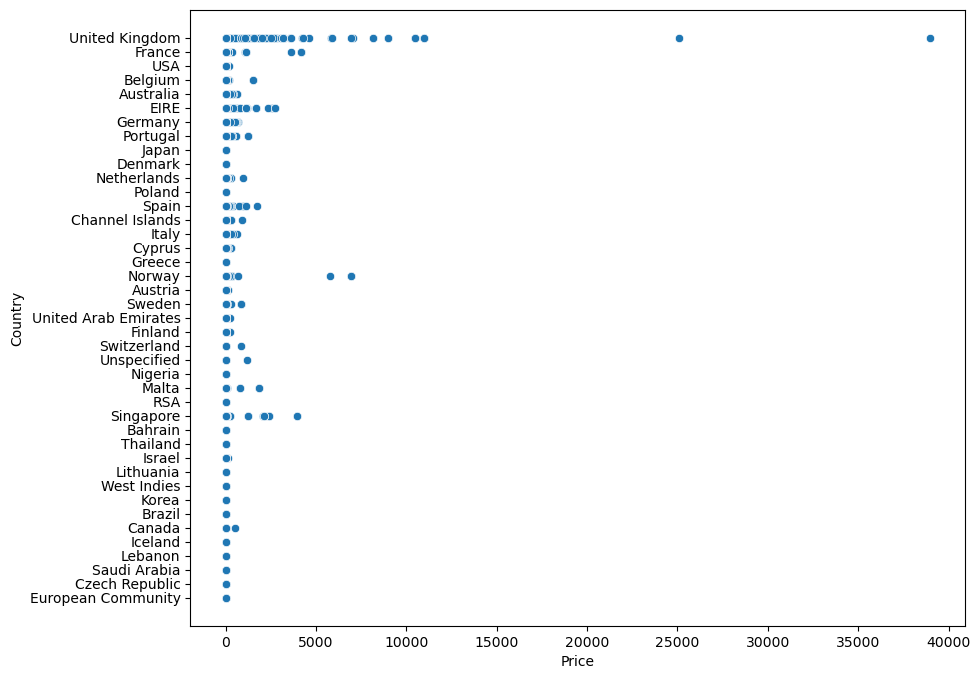

In [13]:
#Data types

# Categories
#   Country
#   Customer ID
#   StockCode
#   Invoice
#   Description

# Numeric
#   Quantity
#   InvoiceDate
#   Price  - Price per Item
plt.figure(figsize=(10, 8))                                                  
sns.scatterplot(x="Price", y="Country", data= df)                                                                                                                                                                                     
plt.show()



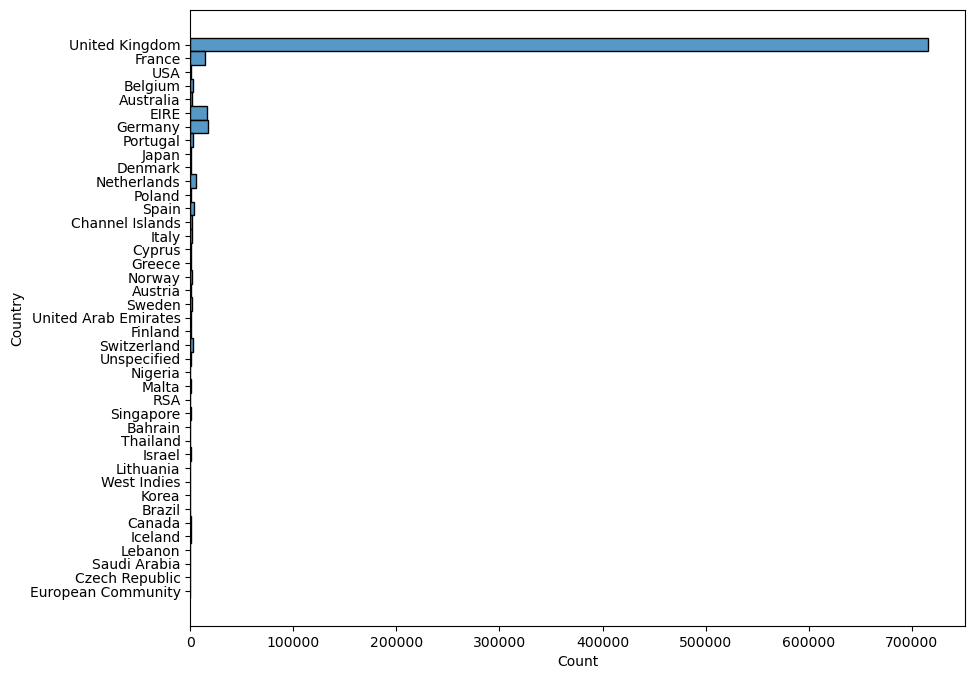

In [15]:
plt.figure(figsize=(10, 8)) 
sns.histplot(data=df, y="Country")
plt.show()

In [16]:
grouped = df.groupby('Country')[['Price', 'Quantity']].describe()
grouped.sort_values(by= "Country", ascending=True)


Price                                             \
                         count       mean         std   min     25%   50%   
Country                                                                     
Australia               1890.0   4.237360   27.016483  0.00  1.2500  1.85   
Austria                  938.0   4.460896   10.286535  0.12  1.2500  1.69   
Bahrain                   59.0   2.890000    2.732939  0.42  1.2500  1.65   
Belgium                 3110.0   4.735119   38.698612  0.00  1.2500  1.95   
Brazil                    94.0   2.726702    2.317098  0.21  1.2500  1.95   
Canada                   228.0   4.640746   36.407783  0.10  0.8500  1.65   
Channel Islands         1646.0   5.403712   25.923453  0.19  1.2500  2.10   
Cyprus                  1157.0   5.419118   17.001744  0.12  1.4500  2.95   
Czech Republic            30.0   2.938333    7.098840  0.29  0.8350  1.45   
Denmark                  797.0   2.891995    3.644728  0.06  0.8500  1.69   
EIRE                   16014.0   6.792462   63.006125  0.00  1.2500  2.10   
European Community        61.0   4.820492    4.375808  0.55  1.4500  3.35   
Finland                 1049.0   4.990095   12.121944  0.12  0.8500  2.08   
France                 13897.0   4.743298   71.049980  0.00  0.8500  1.69   
Germany                17339.0   3.834845   15.961806  0.00  1.2500  1.95   
Greece                   663.0   3.922670    5.377954  0.12  1.2500  2.55   
Iceland                  222.0   2.498063    2.230495  0.25  0.8500  1.95   
Israel                   321.0   3.585919    8.381737  0.06  0.8500  1.69   
Italy                   1507.0   5.554519   24.035836  0.12  1.3500  2.55   
Japan                    565.0   2.171805    2.642688  0.21  0.8500  1.65   
Korea                     63.0   2.384762    1.489488  0.12  1.2500  2.10   
Lebanon                   45.0   5.387556    4.068741  0.55  2.5500  3.95   
Lithuania                154.0   2.564740    1.689138  0.14  1.2500  2.10   
Malta                    299.0  21.991940  165.830210  0.19  1.2500  2.55   
Netherlands             5137.0   3.045499   15.768504  0.00  0.8500  1.65   
Nigeria                   30.0   3.416000    5.209391  0.42  1.2500  1.55   
Norway                  1308.0  31.262294  416.803308  0.00  1.2500  1.95   
Poland                   527.0   3.645598    5.233221  0.19  1.2500  1.65   
Portugal                2414.0   6.798935   56.831587  0.12  1.2500  1.95   
RSA                      123.0   3.232195    3.122484  0.00  1.2500  1.95   
Saudi Arabia              10.0   2.411000    1.385131  0.42  1.6500  2.30   
Singapore                346.0  73.645665  421.916478  0.19  1.2500  2.10   
Spain                   3754.0   5.426934   40.795247  0.00  1.2500  1.95   
Sweden                  1343.0   6.397930   48.344150  0.09  0.8500  1.45   
Switzerland             3058.0   3.842165   16.324974  0.00  1.2500  1.95   
Thailand                  76.0   2.999605    2.809477  0.42  1.2500  2.10   
USA                      535.0   3.282019   11.152036  0.42  1.2500  1.65   
United Arab Emirates     386.0   3.623290   13.596814  0.21  0.9025  1.95   
United Kingdom        716115.0   3.480462   70.893157  0.00  1.2500  1.95   
Unspecified              521.0   5.577543   52.107650  0.12  1.2500  2.08   
West Indies               54.0   2.273519    2.253860  0.19  0.8500  1.25   

                                      Quantity                           \
                       75%       max     count        mean          std   
Country                                                                   
Australia             3.75    662.25    1890.0   54.695767    87.675644   
Austria               3.75    130.00     938.0   12.053305    16.957079   
Bahrain               3.75     12.75      59.0   12.796610    14.857692   
Belgium               4.15   1508.65    3110.0   11.124759    12.531768   
Brazil                2.95     10.95      94.0    5.797872     6.899556   
Canada                2.95    550.94

### Exercises

 *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


# Calculate Revenue
Requires us to multiply the "Price" with the "Quantity" column, as "Price" is the price for a single item.
This is a piece of data we do not have represented in our Dataframe, so it is considering Feature Engineering to add it.

In [ ]:
# Adding column TotalSum, to make it easier to calculcate Revenue
df['TotalSum'] = pd.DataFrame(df['Price'].values  * df['Quantity'].values)
TotalRevenue= ['TotalSum'].sum()

16339404.032000002

# Analyze sales trends by weekdays


In [ ]:
#cursory glance at the range of time-data we have 
print(f'Date and time of the earliest sale: {df['InvoiceDate'].min()} \nDate and time of the latest sale: {df['InvoiceDate'].max()}')

Date and time of the earliest sale: 2009-12-01 07:45:00 
Date and time of the latest sale: 2011-12-09 12:50:00


<Axes: >

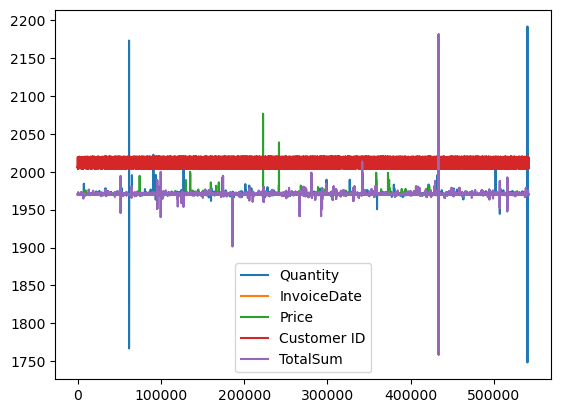

In [71]:
#creating a temp df for time-date analysis so we don't pollute our main df
td = df.copy()
#pivoting so the InvoiceDate is the index
td.pivot_table(values='TotalSum', index='InvoiceDate', aggfunc='sum')
td.plot()

In [ ]:
# Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
# this requires us to know how much each customer spent, but we dont want to pollute the main dataframe.
# creating a temp copy of the main dataframe
tempDf =df.copy()
#creating a total revenue for each Customer ID and appending it to the tempDf
tempDf["total_revenue"] = df['Customer ID'].map(df.groupby("Customer ID")["Price"].sum())
tempDf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSum,total_revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,1142.05
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1142.05
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1142.05
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,1142.05
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1142.05
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,207.5,207.17
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,20.8,207.17
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,8.5,207.17
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,20.8,207.17


In [ ]:
#logic for creating the tiers in the main dataframe
customer_tier = lambda tier: 'Low' if tier < 139 else ('Medium' if tier <= 337 else 'High') 
#basing the logic on the temp DF and bringing the result to the main DF
df['Tier_Category'] = tempDf['total_revenue'].apply(customer_tier)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSum,Tier_Category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,High
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,High
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,High
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,High
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,High
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,207.5,Medium
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,20.8,Medium
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,8.5,Medium
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,20.8,Medium


In [ ]:
# Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
words=['set', 'assortment', 'series', 'selection']

# interates over the list words above. matching any occurance of the word in the description (to lower case).
# sets a true / false value in a column called isACollection  
df['isACollection'] = df['Description'].str.lower().apply(lambda x: any(word in x for word in words))

#below performs a value_count, displaying that the operation above worked.
collection_counts = df['isACollection'].value_counts()
collection_counts